<a href="https://colab.research.google.com/github/AmeerHamza0220/Deep-Learning/blob/main/flower_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sat Jun  5 09:57:15 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    25W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf


In [ ]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))
strategy = tf.distribute.TPUStrategy(resolver)



ValueError: ignored

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')


In [ ]:
# mount google drive in colab vm

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 %cd /

/


In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"ameerhamza0311","key":"e2338bbbbff75a067d714d7b059e4e78"}'}

In [ ]:
! pip install -q kaggle



In [ ]:
! mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
%cd /content/

/content


In [ ]:


!kaggle datasets download -d alxmamaev/flowers-recognition

 96% 434M/450M [00:02<00:00, 219MB/s]
100% 450M/450M [00:02<00:00, 204MB/s]


In [ ]:
!unzip -q flowers-recognition.zip
!rm flowers-recognition.zip

In [ ]:
# this fucking dataset has a clone of himself inside him
# so remove this fucking clone
%cd /content/flowers
!rm -R flowers

/content/flowers


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/flowers", labels='inferred',shuffle=True,image_size=(img_height,
    img_width),subset="training",
 validation_split=0.2,seed=123,
 batch_size=32

)
classes=train_ds.class_names


Found 4323 files belonging to 5 classes.
Using 3459 files for training.


In [ ]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/flowers", labels='inferred',shuffle=True,image_size=(img_height,
    img_width),subset="validation",
 validation_split=0.2,seed=123,
 batch_size=32

)

Found 4323 files belonging to 5 classes.
Using 864 files for validation.


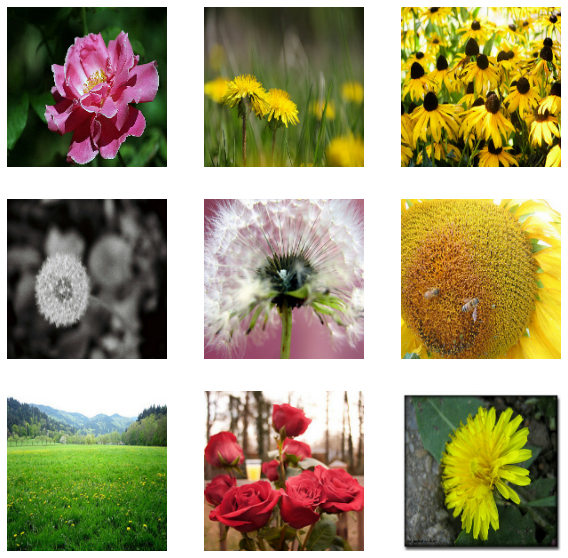

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    
    plt.imshow(images[i].numpy().astype("uint8"))
   
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
# train_set = data.take(3500)
# test_dataset = data.skip(train_size)
# val_dataset = data.skip(test_size)
# test_dataset = data.take(test_size)

In [ ]:
num_classes = 5

def create_model():
  model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(256, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(512, 3, activation='relu'),


  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])
  return model

with tf.device('/device:GPU:0'):
   model=create_model()
   model.compile(
      optimizer='adam',
      loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])
history=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
109/109 [==============================] - 5s 35ms/step - loss: 1.3902 - accuracy: 0.3900 - val_loss: 1.1662 - val_accuracy: 0.4965
Epoch 2/20
109/109 [==============================] - 3s 32ms/step - loss: 1.0867 - accuracy: 0.5507 - val_loss: 1.0040 - val_accuracy: 0.5787
Epoch 3/20
109/109 [==============================] - 3s 32ms/step - loss: 0.9311 - accuracy: 0.6360 - val_loss: 0.8964 - val_accuracy: 0.6412
Epoch 4/20
109/109 [==============================] - 4s 32ms/step - loss: 0.8067 - accuracy: 0.6912 - val_loss: 0.8393 - val_accuracy: 0.6667
Epoch 5/20
109/109 [==============================] - 3s 32ms/step - loss: 0.7144 - accuracy: 0.7300 - val_loss: 0.7827 - val_accuracy: 0.7060
Epoch 6/20
109/109 [==============================] - 3s 32ms/step - loss: 0.5997 - accuracy: 0.7777 - val_loss: 0.9254 - val_accuracy: 0.6493
Epoch 7/20
109/109 [==============================] - 4s 32ms/step - loss: 0.5075 - accuracy: 0.8069 - val_loss: 0.8847 - val_accuracy: 0.6921

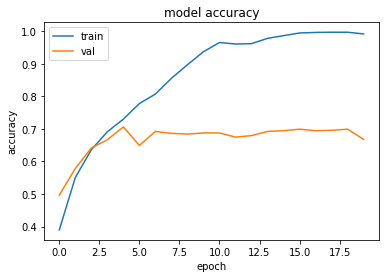

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#data augmentation

In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

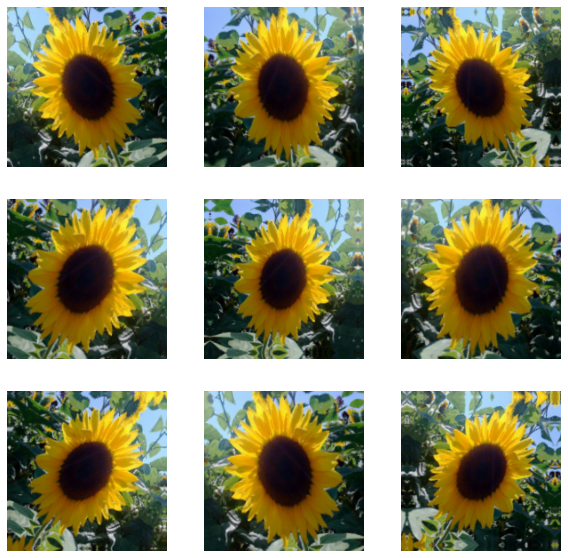

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

New Model with dataaugmetaaiton

In [ ]:
num_classes = 5

def create_model():
  model = tf.keras.Sequential([
  data_augmentation,
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3,padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(32, 3,padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(64, 3, padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(128, 3,padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

  tf.keras.layers.Conv2D(256, 3,padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

 tf.keras.layers.Conv2D(512, 3,padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])
  return model
model=create_model()
   

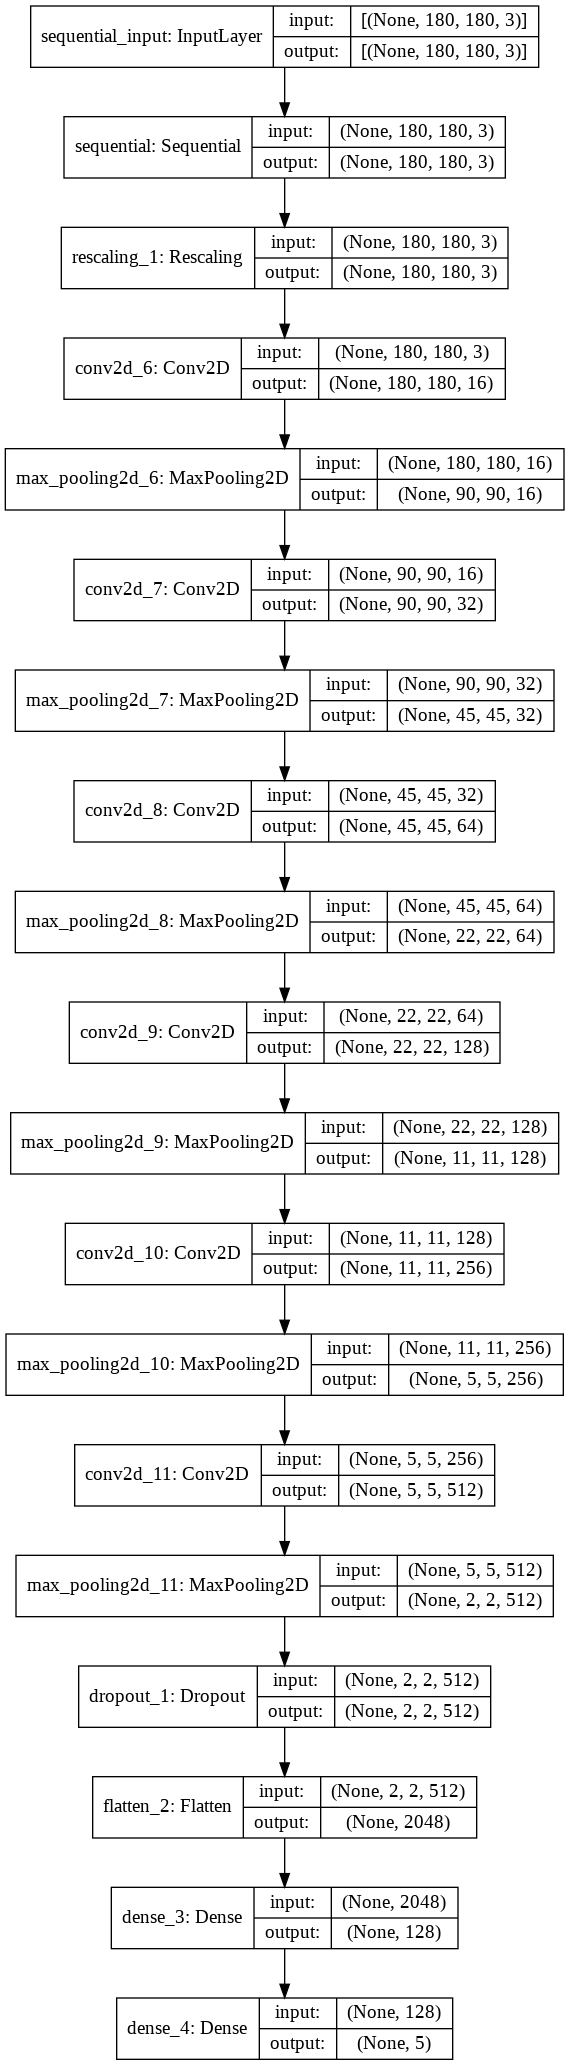

In [ ]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)


In [ ]:
model.compile(
      optimizer='adam',
      loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=['accuracy'])
history=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20)

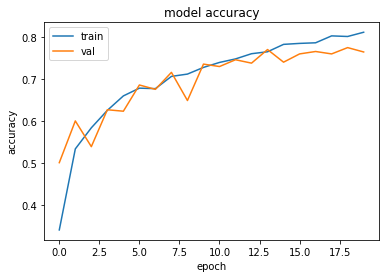

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
t=val_ds.take(1)


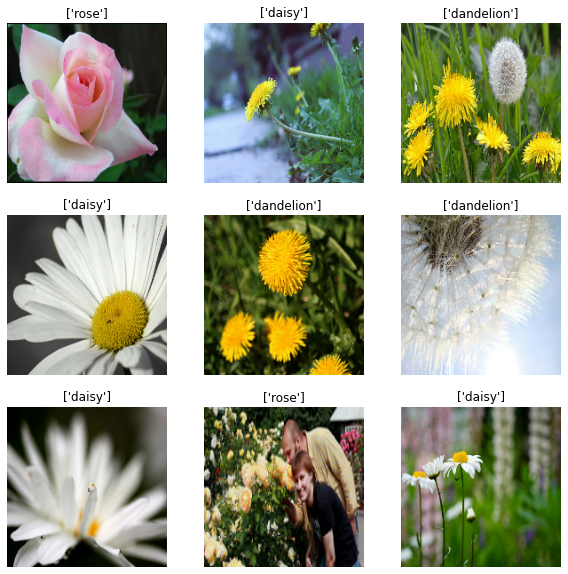

In [ ]:
import numpy as np
img=None
for image,_ in t:
   img=image
vals=model.predict(img)  

labels=[]
for val in vals:
  labels.append(classes[np.argmax(val, axis=-1)])
labels[0]
plt.figure(figsize=(10, 10))

for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(img[i].numpy().astype("uint8"))
  plt.title([labels[i]])
  plt.axis("off")

In [ ]:
#saving model
model.save('/content/drive/My Drive/models')

INFO:tensorflow:Assets written to: /content/drive/My Drive/models/assets


In [ ]:
%cd /content/drive/My Drive/models


/content/drive/My Drive/models


In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/My Drive/models')
vals=model.predict(img)  

labels=[]
for val in vals:
  labels.append(classes[np.argmax(val, axis=-1)])
labels[0]
plt.figure(figsize=(10, 10))

for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(img[i].numpy().astype("uint8"))
  plt.title([labels[i]])
  plt.axis("off")

**Transfer Leanring with keras**


In [ ]:
resnet=model=tf.keras.applications.ResNet50(
    weights='imagenet',
    input_shape=(180, 180, 3),
    include_top=False)
resnet.trainable=False

94773248/94765736 [==============================] - 2s 0us/step


In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
num_classes=5
model=tf.keras.Sequential([
                           data_augmentation,
    resnet,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(num_classes,activation='softmax')
]
)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 180, 180, 3)       0         
_________________________________________________________________
resnet50 (Functional)        (None, 6, 6, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 73728)             0         
_________________________________________________________________
dense (Dense)                (None, 5)                 368645    
Total params: 23,956,357
Trainable params: 368,645
Non-trainable params: 23,587,712
_________________________________________________________________


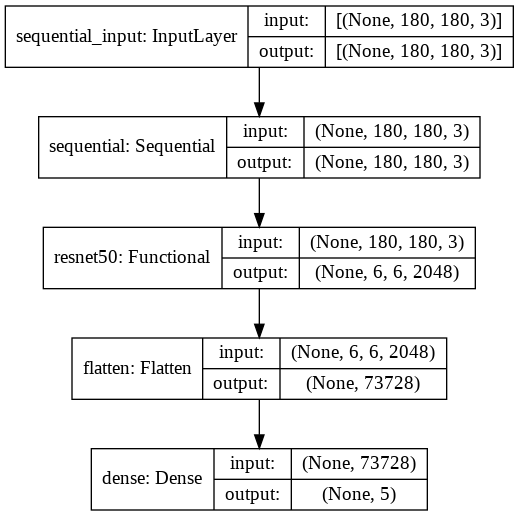

In [ ]:
from keras.utils.vis_utils import plot_model
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)


In [ ]:
model.compile(
      optimizer=tf.keras.optimizers.Adam(3e-5),
      loss=tf.losses.SparseCategoricalCrossentropy(),
      metrics=['accuracy'])
history=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=20
)

Epoch 1/20
109/109 [==============================] - 22s 156ms/step - loss: 0.8627 - accuracy: 0.7202 - val_loss: 0.6384 - val_accuracy: 0.8461
Epoch 2/20
109/109 [==============================] - 16s 148ms/step - loss: 0.3575 - accuracy: 0.8725 - val_loss: 0.5497 - val_accuracy: 0.8657
Epoch 3/20
109/109 [==============================] - 16s 148ms/step - loss: 0.2221 - accuracy: 0.9217 - val_loss: 0.4730 - val_accuracy: 0.8808
Epoch 4/20
109/109 [==============================] - 16s 148ms/step - loss: 0.1480 - accuracy: 0.9494 - val_loss: 0.5082 - val_accuracy: 0.8796
Epoch 5/20
109/109 [==============================] - 16s 148ms/step - loss: 0.0906 - accuracy: 0.9679 - val_loss: 0.4652 - val_accuracy: 0.8924
Epoch 6/20
109/109 [==============================] - 16s 148ms/step - loss: 0.0743 - accuracy: 0.9786 - val_loss: 0.4570 - val_accuracy: 0.8935
Epoch 7/20
109/109 [==============================] - 16s 149ms/step - loss: 0.0491 - accuracy: 0.9844 - val_loss: 0.4784 - val_ac

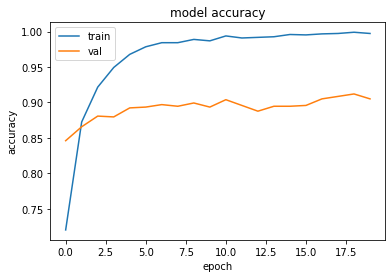

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#fine tuning
model.trainable=True
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-6),
    loss=tf.losses.SparseCategoricalCrossentropy(),
      metrics=['accuracy']
)
history=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=4
)

Epoch 1/4
109/109 [==============================] - 22s 157ms/step - loss: 0.0058 - accuracy: 0.9977 - val_loss: 0.4773 - val_accuracy: 0.9028
Epoch 2/4
109/109 [==============================] - 16s 149ms/step - loss: 0.0053 - accuracy: 0.9983 - val_loss: 0.4649 - val_accuracy: 0.9097
Epoch 3/4
109/109 [==============================] - 16s 150ms/step - loss: 0.0060 - accuracy: 0.9977 - val_loss: 0.4664 - val_accuracy: 0.9097
Epoch 4/4
109/109 [==============================] - 16s 149ms/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.4646 - val_accuracy: 0.9097


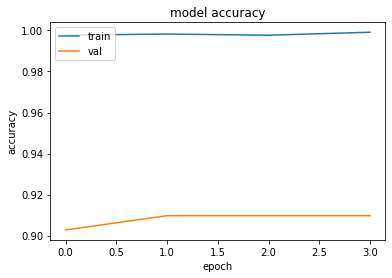

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()